# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [ ]:
! git clone https://www.github.com/DS3001/assignment2

fatal: destination path 'assignment2' already exists and is not an empty directory.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

(1) The paper is goes over the frameworks to make data cleaning (tidying) easier for data scientists

(2) The “tidy data standard” aims to facilitate the initial exploration and analysis of the data and to simplify the development of data analysis tools. In this case you don’t have to worry about translating various tidy data tools together

(3) The first sentence means that the tools you use while cleaning data across different datasets might be similar but each dataset present their own unique way to manipulating those tools since they’re different in their own ways. The second sentence means that the definition of variables and observation is very obvious - variables are the columns while the observations are the rows. But in real life different variables might mean different things depending on how one interprets it. This might create issues between individuals’ understandings of the dataset.

(4) He defines value as are either numbers (if quantitative) or strings (if qualitative). A variable contains all the values that measures the same underlying attribute across unit. An observation contains all values measured on the same unit across attributes.

(5) Tidy data is defined so that each variable is a column each observation is a row and each type of observational unit is a table

(6) The 5 most common problems with messy datasets are column headers are values not variable names; multiple variables are stored in one column; variables are stored in both rows and columns; multiple types of observational units are stored in the same table; a single observational unit is stored in multiple tables. The data in table 4 is messy because the columns are the values of a variable income. Melting a dataset is the process when converting values in columns into usable rows

(7) Table 11 is messy because the values of days are in the columns. Table 12 is tidy and “molten” because it solves the issues table 11 has and made all the days into rows for a single column “date”

(8) The “chicken-and-egg” problem with focusing on tidy data is that Wickham doesn’t want his proposed tidy framework to only focus on promoting certain tools instead it should be used to promote the idea of easier more unified data cleaning. Wickham hope that in the future to have a more structured system in data cleaning

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
###Part 1###
#setting up the work environment with packages
import pandas as pd
import numpy as np
import seaborn as sns

#analyzing the data
df = pd.read_csv('/content/assignment2/data/airbnb_hw.csv') #read airbnb data to df
print(df.shape, '\n') #dimension of df
print(df.dtypes, '\n') #types of variables and we find price is an 'object'
df.head() #first to look at different variables and rows in the dataset
df['Price'].unique() #shows the unique value for price

#after this portion we can see that the data type for 'price' needs to be changed
#we also need to get rid of the thousands separators in some of the values

#tidying the data
price = df['Price']
price = price.str.replace(',','') #replace thousands separator with nothing
price = pd.to_numeric(price) #convert the price to a numeric datatype
df['Price'] = price
missing_data_count = price.isnull().sum()
print('missing value count:',missing_data_count)
#print(df.dtypes)


###conclusion: we end up with 0 missing values

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

missing value count: 0


In [ ]:
###Part 2###
#setting up the work environment with packages
import pandas as pd
import numpy as np
import seaborn as sns

#analyzing the data
df2 = pd.read_csv('/content/assignment2/data/sharks.csv', low_memory=False)
print(df2.shape, '\n') #dimension of df -> 5 rows 257 columns
print(df2.dtypes, '\n') #types of variables and we find type is an 'object'
df2.head() #first to look at different variables and rows in the dataset we find the names a
df2['Type'].value_counts() #shows how many are there for each type

##after this portion we find that we need to get rid of the unconfirmed, unverified, invalid, questionable, underinvestigation (because there is only 1)
##we also see that there is a lot of boat/water craft related things with boatomg typed wrong so we can combine those together
##in conclusion there should be three types: unprovoked, provoked, watercraft

#tidying the data
types = df2['Type']
types = types.replace(['Sea Disaster', 'Watercraft', 'Boat', 'Boating', 'Boatomg'],'Watercraft')
#the step above combines all the watercraft accidents together
types = types.replace(['Invalid','Questionable','Unconfirmed','Unverified','Under investigation'],np.nan)
#the step above gets rid of all the non-important types
df2['Type'] = types #overwrite the original type in dataset to the new tidied dataset
df2['Type'].value_counts() #checking if the corrections made are reflected

(6462, 257) 

index             int64
Case Number      object
Date             object
Year            float64
Type             object
                 ...   
Unnamed: 251    float64
Unnamed: 252    float64
Unnamed: 253    float64
Unnamed: 254    float64
Unnamed: 255    float64
Length: 257, dtype: object 



Unprovoked    4716
Provoked       593
Watercraft     583
Name: Type, dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
###Part 3###
#setting up the work environment with packages
import pandas as pd
import numpy as np
import seaborn as sns

#Anlyzing the data
df3 = pd.read_csv('/content/drive/MyDrive/DS3001/October 2017 Cohort_Virginia Pretrial Data Project_Deidentified FINAL Update_10272021.csv',low_memory=True)
print(df3['WhetherDefendantWasReleasedPretrial'].value_counts(), '\n') #it shows we need to get rid of 9
df3['WhetherDefendantWasReleasedPretrial'] = df3['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)
df3['WhetherDefendantWasReleasedPretrial'] = df3['WhetherDefendantWasReleasedPretrial'].dropna() #use dropna from panda
print(df3['WhetherDefendantWasReleasedPretrial'].value_counts(), '\n')

<ipython-input-22-d73a6e99e60d>:8: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,

1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 

1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 



In [ ]:
###Part 4###
sentence = df3['ImposedSentenceAllChargeInContactEvent']
sentencetype = df3['SentenceTypeAllChargesAtConvictionInContactEvent']

#print(sentence.unique)
#print(sentencetype.unique)
#print(df3.dtypes, '\n')

sentence = pd.to_numeric(sentence, errors = 'coerce')
print('sentence is null:', sentence.isnull().sum(), '\n')
sentencenull = sentence.isnull()

print(pd.crosstab(sentencenull, sentencetype), '\n') #there is approx. 9k na for type 4 so we should get rid of it
#type 4 cases probably didn't get any sentences so we'll put 0 for the time
#same for type 9

sentence = sentence.mask(sentencetype==4, 0)
sentence = sentence.mask(sentencetype == 9, 0)

df3['ImposedSentenceAllChargeInContactEvent'] = sentence
print('remaining na values:',sentence.isnull().sum())

sentence is null: 9053 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274 

remaining na values: 0


**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [ ]:
#step 1 - df is already loaded and 'Price' is already cleaned in question 1

#step 2
print(df.shape)
df.head()
#our data's dimension has 30478 observations of 13 variables
df.columns

(30478, 13)


Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [ ]:
#step 3
pd.crosstab(df['Property Type'], df['Room Type'])

#There is a lot of properties that has small amount of rentals overall
#and they're all "specialty" properties like cabin and boats.
#The main property in terms of overal rental rate is Apartment, House
#loft, B&B and Townhouses
#Among those main properties, House is a more common in renting a
#private room instead of the entire property

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


<Axes: xlabel='Price', ylabel='Count'>

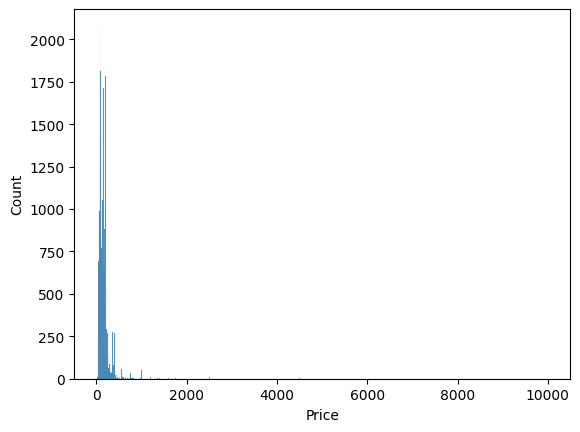

In [ ]:
#step 4
sns.histplot(data = df, x = "Price") #making histogram

<Axes: xlabel='Price', ylabel='Density'>

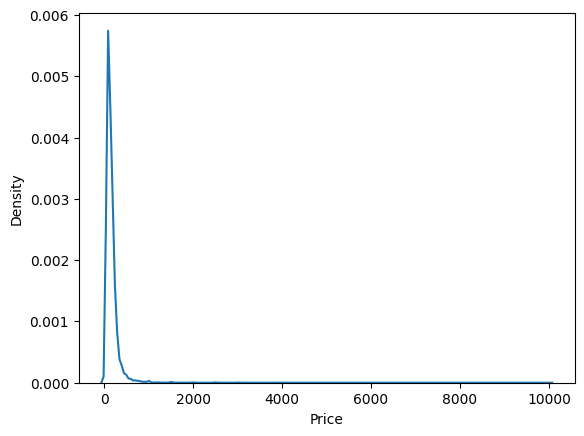

In [ ]:
sns.kdeplot(data = df, x ="Price") #making kernel density plot

<Axes: xlabel='Price'>

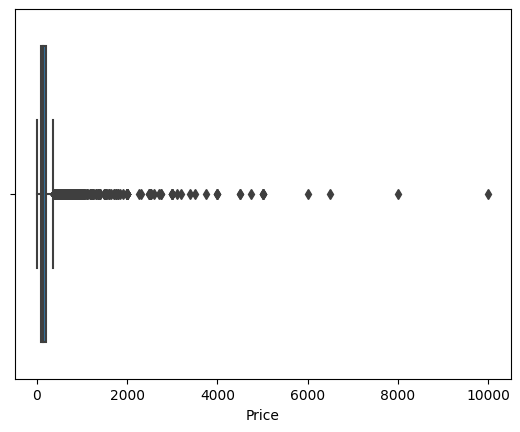

In [ ]:
sns.boxplot(data = df, x ="Price")

In [ ]:
df['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

The data is badly scaled and has multiple outliers as indicated in the histogram and boxplot.

<Axes: xlabel='price_log', ylabel='Count'>

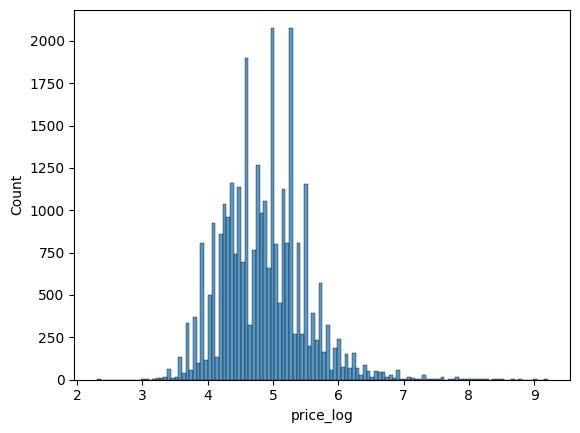

In [ ]:
df['price_log'] = np.log(df['Price'])
sns.histplot(data = df, x = "price_log")

<Axes: xlabel='price_log', ylabel='Density'>

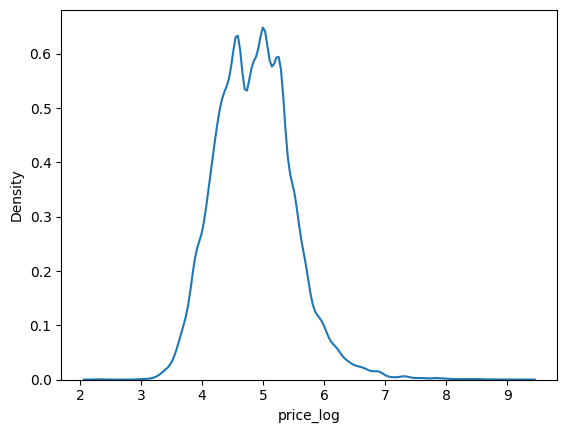

In [ ]:
sns.kdeplot(data = df, x = "price_log")

<Axes: xlabel='price_log'>

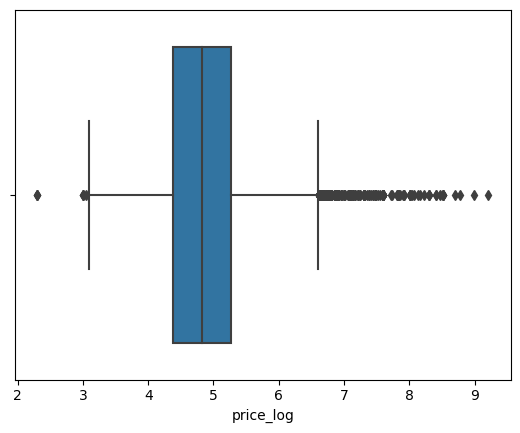

In [ ]:
sns.boxplot(data = df, x = "price_log")

<Axes: xlabel='Beds', ylabel='price_log'>

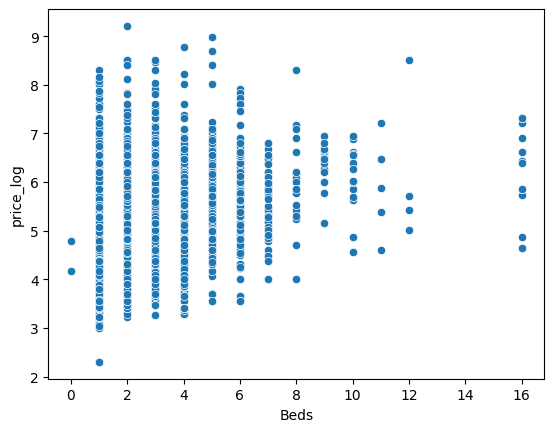

In [ ]:
#step 5
sns.scatterplot(data = df, x = "Beds", y = "price_log")

#I see from this scatterplot that typically the number of beds goes up the price also goes up

In [ ]:
df.loc[:, ['Beds','Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

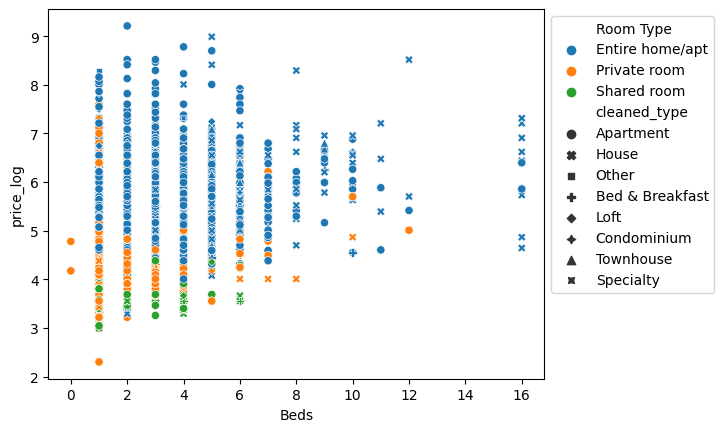

In [ ]:
#step 6

c_ptype = df['Property Type']
c_ptype = c_ptype.replace(['Dorm', 'Boat','Cabin','Villa','Bungalow',
                           'Camper/RV','Treehouse','Tent','Hut','Lighthouse',
                           'Chalet','Castle'], 'Specialty')
df['cleaned_type'] = c_ptype

plot = sns.scatterplot(data = df, x = 'Beds', y= 'price_log', hue = 'Room Type', style = 'cleaned_type')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

#the pattern I see from the graph is that entire home/apartment renting is
#typically higher price compare to all the other types of rentals. Apartments
#and houses typically have a higher price compare to all the other properties

In [ ]:
df.loc[:, ['Room Type', 'Price']].groupby('Room Type').describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

In [ ]:
df.loc[:, ['cleaned_type', 'Price']].groupby('cleaned_type').describe()

#the highest prices on average: condominium, entire home/apartment
#highest standard deviation: other, entire home/apartment
#the median would be a better estiation for central tendency because of the
#number of outliers

Price                                                       \
                   count        mean         std   min     25%    50%     75%   
cleaned_type                                                                    
Apartment        27102.0  162.045642  181.376882  10.0   85.00  130.0  195.00   
Bed & Breakfast    180.0  106.572222   84.701977  30.0   65.00   87.5  125.00   
Condominium         94.0  256.585106  249.357946  46.0  131.25  175.0  298.75   
House             2090.0  156.722967  307.116948  10.0   60.00   85.0  150.00   
Loft               753.0  221.960159  271.958145  30.0   80.00  140.0  240.00   
Other               47.0  394.659574  696.663423  39.0   82.50  135.0  378.00   
Specialty           73.0  129.027397  177.129502  30.0   60.00   90.0  150.00   
Townhouse          136.0  203.933824  264.178901  45.0   89.50  135.0  206.25   

                          
                     max  
cleaned_type              
Apartment        10000.0  
Bed & Breakfast    900.0  
Condominium       1990.0  
House             8000.0  
Loft              3000.0  
Other             4000.0  
Specialty         1500.0  
Townhouse         2500.0

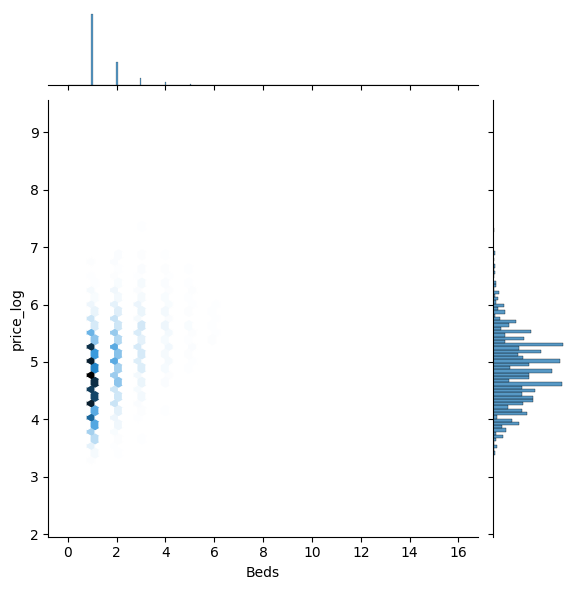

In [ ]:
#step 7
sns.jointplot(data = df, x ='Beds', y = 'price_log', kind = 'hex')

#from this plot we can see that majority of the properties for rent have either one or two beds
#majority of the properies for rent is around 4-6 in terms of log price ranges
#there are some outliers both in prices and beds for rent